# Covid-19 현황 분석

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
key_fd = open('gov_data_api_key.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [3]:
start_date = '20201129'
end_date = '20201129'
page = 1

In [4]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'

In [5]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
resultCode = soup.find('resultCode').get_text()
if resultCode == '00':
    print(soup.find('totalCount').string)
elif resultCode == '99':
    print(soup.find('resultMsg').string)

SERVICE ACCESS DENIED ERROR.


In [6]:
createDt_list,deathCnt_list,defCnt_list,gubun_list,incDec_list = [],[],[],[],[]
isolClearCnt_list,isolIngCnt_list,localOccCnt_list,overFlowCnt_list = [],[],[],[]
qurRate_list,seq_list,stdDay_list,updateDt_list = [],[],[],[]
items = soup.find_all('item')
for item in items:
    createDt_list.append(item.find('createDt').string if item.find('createDt') else '')
    deathCnt_list.append(item.find('deathCnt').string if item.find('deathCnt') else '')
    defCnt_list.append(item.find('defCnt').string if item.find('defCnt') else '')
    gubun_list.append(item.find('gubun').string if item.find('gubun') else '')
    incDec_list.append(item.find('incDec').string if item.find('incDec') else '')
    isolClearCnt_list.append(item.find('isolClearCnt').string if item.find('isolClearCnt') else '')
    isolIngCnt_list.append(item.find('isolIngCnt').string if item.find('isolIngCnt') else '')
    localOccCnt_list.append(item.find('localOccCnt').string if item.find('localOccCnt') else '')
    overFlowCnt_list.append(item.find('overFlowCnt').string if item.find('overFlowCnt') else '')
    qurRate_list.append(item.find('qurRate').string if item.find('qurRate') else '')
    seq_list.append(item.find('seq_list').string if item.find('seq_list') else '')
    stdDay_list.append(item.find('stdDay').string if item.find('stdDay') else '')
    updateDt_list.append(item.find('updateDt').string if item.find('updateDt') else '')

df = pd.DataFrame({
    '등록시간':createDt_list, '사망자':deathCnt_list, '확진자':defCnt_list,
    '광역시도':gubun_list, '전일대비':incDec_list, '격리해제':isolClearCnt_list, 
    '격리중':isolIngCnt_list, '지역발생':localOccCnt_list,'해외유입':overFlowCnt_list,
    '10만명당':qurRate_list, 'ID':seq_list, '기준시간':stdDay_list, '수정시간':updateDt_list
})
df

,등록시간,사망자,확진자,광역시도,전일대비,격리해제,격리중,지역발생,해외유입,10만명당,ID,기준시간,수정시간


In [7]:
from tqdm import tqdm_notebook
month_dict = {3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30}

In [8]:
day_dict_list = []
for k, v in tqdm_notebook(month_dict.items()):
    month = str(k) if k >= 10 else f'0{k}'
    for i in range(1, v+1):
        day = str(i) if i >= 10 else f'0{i}'
        date = f'2020{month}{day}'
        page = 1
        url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={date}&endCreateDt={date}'
        soup = BeautifulSoup(requests.get(url).text, 'xml')
        #print(soup.find('totalCount').string, end=', ')
        day_dict = {'date':date, '서울':0, '부산':0, '대구':0, '인천':0, '대전':0, 
                    '광주':0, '울산':0, '세종':0, '경기':0, '강원':0, '충북':0, 
                    '충남':0, '경북':0, '경남':0, '전북':0, '전남':0, '제주':0}

        items = soup.find_all('item')
        item_count = len(items)
        for index, item in enumerate(items):
            if item_count > 30 and index >= int(item_count/2):
                break
            area = item.find('gubun').string
            count = int(item.find('incDec').string) if item.find('incDec') else 0
            if area in day_dict.keys():
                day_dict[area] = count
        
        day_dict_list.append(day_dict)


In [9]:
corona_raw = pd.DataFrame(day_dict_list)
corona_raw['date'] = pd.to_datetime(corona_raw['date'])
corona_raw.set_index('date', inplace=True)
corona_raw.tail()

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주
date,,,,,,,,,,,,,,,,,
2020-11-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-11-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-11-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-11-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-11-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
corona_raw.head()

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주
date,,,,,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
corona_raw['합계'] = corona_raw.sum(axis=1) 

In [12]:
corona_raw.to_csv('./results/전국코로나일별.csv')

### 전국코로나일별.csv 파일에서 데이터 읽기

In [13]:
corona_raw = pd.read_csv('./results/전국코로나일별.csv')
corona_raw['date'] = pd.to_datetime(corona_raw['date'])
corona_raw.set_index('date', inplace=True)
corona_raw.head()

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
date,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 월별 분석

In [14]:
corona = corona_raw.resample('M').sum()
corona.index = ['3월','4월','5월','6월','7월','8월','9월','10월','11월']
corona

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
3월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
coronaT = corona.T
coronaT['합계'] = coronaT.sum(axis=1)
coronaT

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,0,0,0,0,0,0,0,0,0,0
부산,0,0,0,0,0,0,0,0,0,0
대구,0,0,0,0,0,0,0,0,0,0
인천,0,0,0,0,0,0,0,0,0,0
대전,0,0,0,0,0,0,0,0,0,0
광주,0,0,0,0,0,0,0,0,0,0
울산,0,0,0,0,0,0,0,0,0,0
세종,0,0,0,0,0,0,0,0,0,0
경기,0,0,0,0,0,0,0,0,0,0
강원,0,0,0,0,0,0,0,0,0,0


In [16]:
coronaT = coronaT.iloc[:-1, :]
coronaT

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,0,0,0,0,0,0,0,0,0,0
부산,0,0,0,0,0,0,0,0,0,0
대구,0,0,0,0,0,0,0,0,0,0
인천,0,0,0,0,0,0,0,0,0,0
대전,0,0,0,0,0,0,0,0,0,0
광주,0,0,0,0,0,0,0,0,0,0
울산,0,0,0,0,0,0,0,0,0,0
세종,0,0,0,0,0,0,0,0,0,0
경기,0,0,0,0,0,0,0,0,0,0
강원,0,0,0,0,0,0,0,0,0,0


### 그래프로 시각화하기

In [17]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

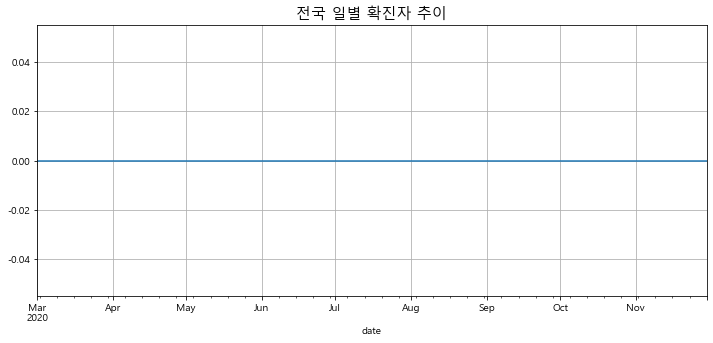

In [18]:
corona_raw['합계'].plot(grid=True, figsize=(12,5))
plt.title('전국 일별 확진자 추이', fontsize=15)
plt.show()

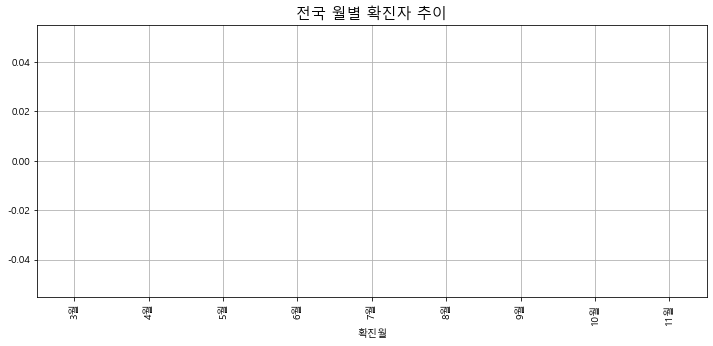

In [19]:
corona['합계'].plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('확진월')
plt.title('전국 월별 확진자 추이', fontsize=15)
plt.show()

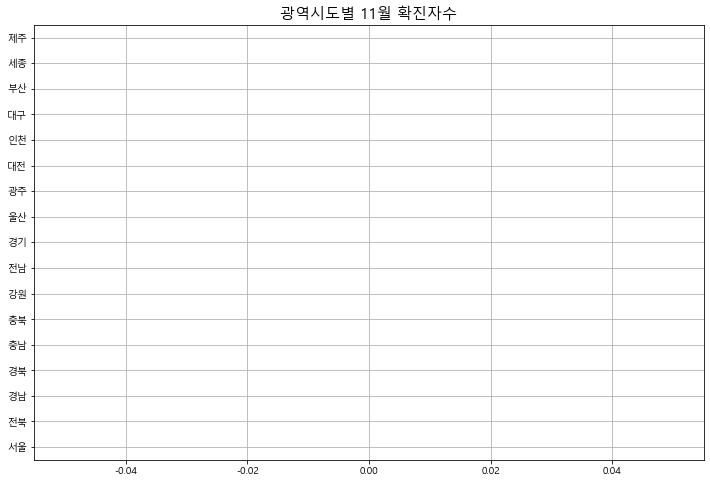

In [20]:
coronaT['11월'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('광역시도별 11월 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

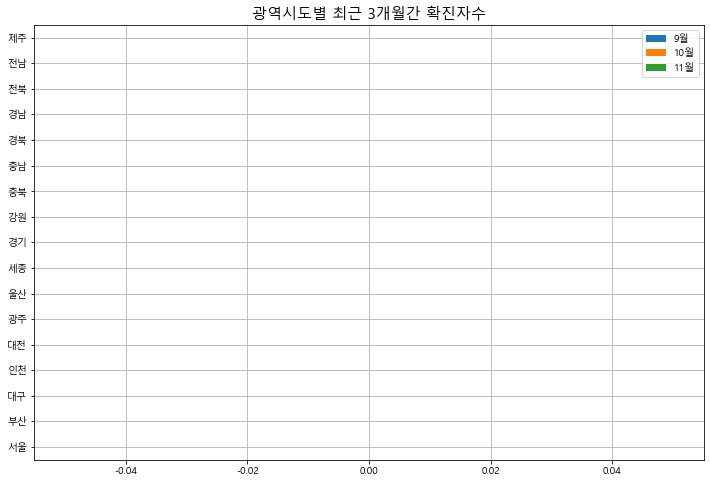

In [21]:
coronaT[['9월','10월','11월']].plot(kind='barh', grid=True, figsize=(12,8))
plt.title('광역시도별 최근 3개월간 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

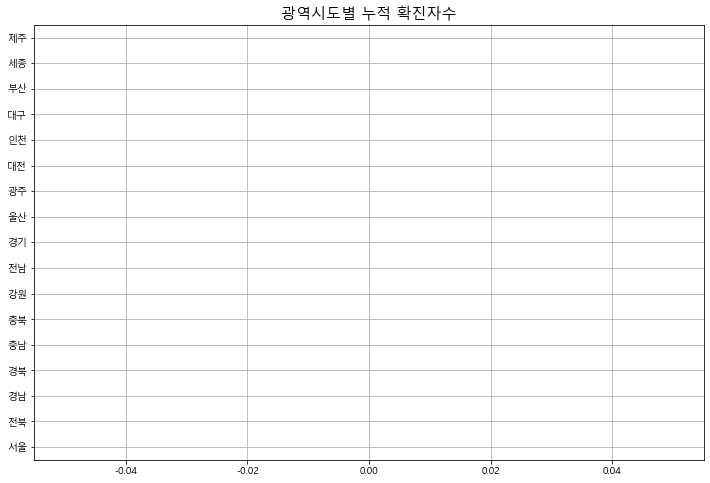

In [22]:
coronaT['합계'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('광역시도별 누적 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

### 광역시도 인구 데이터 가져오기

In [23]:
df = pd.read_csv('../08_Korea/data/성별, 연령별 인구 - 시군구(2019).csv', encoding='euc-kr')
df.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [24]:
df = df[df['시군구'] == '소계']
df.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
78,부산,소계,NaN,계,3222121,361732,138437,181186,213061,183698,...,227042,265187,267800,291826,281402,203549,153324,117606,66519,34465
79,부산,소계,NaN,남자,1565704,185909,70460,85793,111372,93666,...,114588,131150,128473,138281,132629,95898,70577,51297,25798,10549


In [25]:
df = df[df['구분'] == '계']
df

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
78,부산,소계,NaN,계,3222121,361732,138437,181186,213061,183698,...,227042,265187,267800,291826,281402,203549,153324,117606,66519,34465
129,대구,소계,NaN,계,2332499,289897,116524,138834,153660,131876,...,171737,209381,210760,208452,174908,123485,90289,74618,45796,25043
156,인천,소계,NaN,계,2799553,367306,133389,154888,203576,180966,...,219670,250290,248672,251499,202461,122894,93462,70395,44432,27884
189,광주,소계,NaN,계,1409750,198574,78709,92050,96736,81846,...,111747,130062,121938,111871,91096,60843,50106,38425,22967,13289
207,대전,소계,NaN,계,1420059,188996,76028,97373,103601,88788,...,107948,127004,121535,116369,98441,64487,47082,37396,23799,14030
225,울산,소계,NaN,계,1083587,157177,51091,55478,69939,66609,...,85279,99135,105180,100635,80066,49374,31887,22568,12790,7288
243,세종,소계,NaN,계,321495,67307,14936,15223,18860,24369,...,32099,28878,21464,18885,15632,10036,7025,5656,3830,2680
249,경기,소계,NaN,계,12437493,1780295,618620,670267,853024,809456,...,1027268,1161425,1087603,1024664,819471,511765,394666,310540,200400,121659
396,강원,소계,NaN,계,1428480,170616,62065,72450,77990,71085,...,96776,119424,123065,135101,126928,83389,67561,62916,42314,25411


In [26]:
pop_corona = df[['광역시도', '합계']]
pop_corona.columns = ['광역시도', '인구수']
pop_corona.set_index('광역시도', inplace=True)
pop_corona.head()

,인구수
광역시도,
서울,9096901
부산,3222121
대구,2332499
인천,2799553
광주,1409750


In [27]:
pop_corona['확진자수'] = coronaT['합계']
pop_corona.head()

,인구수,확진자수
광역시도,,
서울,9096901,0
부산,3222121,0
대구,2332499,0
인천,2799553,0
광주,1409750,0


In [28]:
pop_corona['천명당 확진자 수'] = pop_corona['확진자수'] / pop_corona['인구수'] * 1000
pop_corona.head()

,인구수,확진자수,천명당 확진자 수
광역시도,,,
서울,9096901,0,0.0
부산,3222121,0,0.0
대구,2332499,0,0.0
인천,2799553,0,0.0
광주,1409750,0,0.0


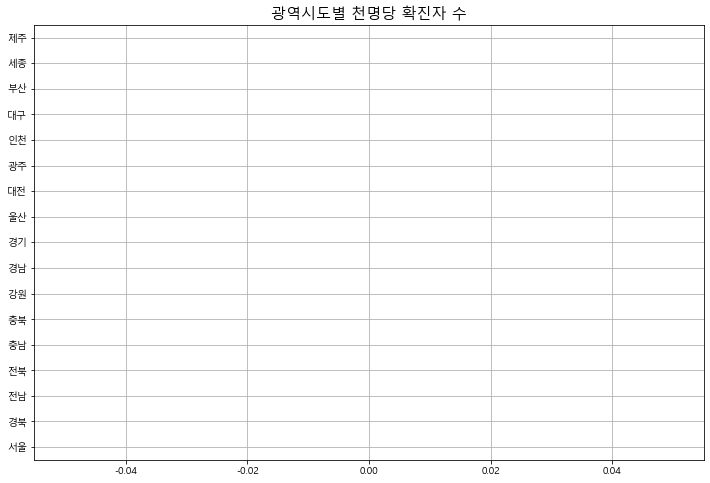

In [29]:
pop_corona['천명당 확진자 수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('광역시도별 천명당 확진자 수', fontsize=15)
plt.ylabel('')
plt.show()

### 지도 시각화

In [30]:
from urllib.parse import quote
import folium

In [31]:
key_fd = open('../07_Seoul/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

#### Kakao API에서 키워드로 위도, 경도 구하기

In [32]:
addr = '제주도청'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query='+quote(addr)
result = requests.get(url,
            headers={"Authorization": "KakaoAK "+kmap_key}).json()
result['documents'][0]['y'], result['documents'][0]['x']

('33.4889107081882', '126.498233486738')

In [33]:
lat_list, lng_list = [], []
for index, area in enumerate(pop_corona.index):
    addr = area+'시청' if index <= 7 else area+'도청'
    if area == '광주':
        addr = '광주광역시청'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query='+quote(addr)
    result = requests.get(url,
                          headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [34]:
pop_corona['위도'] = lat_list
pop_corona['경도'] = lng_list
pop_corona.head()

,인구수,확진자수,천명당 확진자 수,위도,경도
광역시도,,,,,
서울,9096901,0,0.0,37.566824,126.978652
부산,3222121,0,0.0,35.179737,129.075068
대구,2332499,0,0.0,35.871380,128.601805
인천,2799553,0,0.0,37.456004,126.705258
광주,1409750,0,0.0,35.160102,126.851630


In [35]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7, tiles='Stamen Toner')
for i in pop_corona.index:
    folium.CircleMarker(
        location=[pop_corona['위도'][i], pop_corona['경도'][i]],
        radius=pop_corona['확진자수'][i]/200,
        popup=i,
        tooltip=f"{i}, {pop_corona['확진자수'][i]}",
        color='#3186cc', fill_color='#3186cc'
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>광역시도별 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [36]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
for i in pop_corona.index:
    folium.CircleMarker(
        location=[pop_corona['위도'][i], pop_corona['경도'][i]],
        radius=pop_corona['천명당 확진자 수'][i]*25,
        popup=i,
        tooltip=f"{i}, {round(pop_corona['천명당 확진자 수'][i], 2)}",
        color='crimson', fill_color='crimson'
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>광역시도별 천명당 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map